# Import Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/forest-cover-type-dataset


In [ ]:
import pandas as pd

df = pd.read_csv("/kaggle/input/forest-cover-type-dataset/covtype.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


# Import Modules and Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Checking on the Dataset

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


# Train Test Split for the Model Training

In [ ]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [ ]:
# The target variable 'Cover_Type' is 1-indexed in the dataset (1-7).
# For scikit-learn, it's often better to have 0-indexed classes.
# We'll adjust it by subtracting 1.
y = y - 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (464809, 54), y_train shape: (464809,)
X_test shape: (116203, 54), y_test shape: (116203,)


In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns:")
print(numerical_cols)

Numerical columns:
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


# Scaling Numeric Features

In [ ]:
scaler = StandardScaler()
# Remove 'Cover_Type' from the list of numerical columns before scaling
numerical_cols.remove('Cover_Type')
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
print("Numerical features scaled.")

Numerical features scaled.


# Visualization Functions

In [ ]:
# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name, class_labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Function to plot Feature Importance
def plot_feature_importance(model, feature_names, model_name, top_n=20):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'): # For linear models if used, though not primary here
        importances = np.abs(model.coef_[0]) # Take absolute for multi-class
    else:
        print(f"Model {model_name} does not have feature importances.")
        return

    indices = np.argsort(importances)[::-1]
    top_indices = indices[:top_n]

    plt.figure(figsize=(12, 7))
    plt.title(f"Top {top_n} Feature Importances for {model_name}")
    sns.barplot(x=importances[top_indices], y=[feature_names[i] for i in top_indices], palette='viridis')
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# Training the Models

In [ ]:
# Get the unique class labels for plotting
class_labels = sorted(y.unique())
# Since we subtracted 1, they are now 0-6. Let's map them back for display.
display_class_labels = [f'Type {i+1}' for i in class_labels]

In [ ]:
# Train RF Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=display_class_labels))


Random Forest Performance:
Accuracy: 0.9548
Classification Report:
              precision    recall  f1-score   support

      Type 1       0.97      0.94      0.95     42368
      Type 2       0.95      0.97      0.96     56661
      Type 3       0.94      0.96      0.95      7151
      Type 4       0.91      0.85      0.88       549
      Type 5       0.95      0.78      0.86      1899
      Type 6       0.93      0.89      0.91      3473
      Type 7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



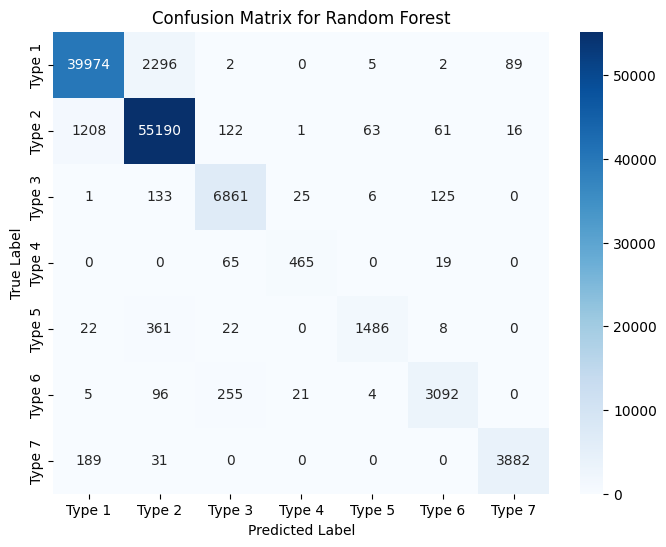

/tmp/ipython-input-2767526744.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[top_indices], y=[feature_names[i] for i in top_indices], palette='viridis')


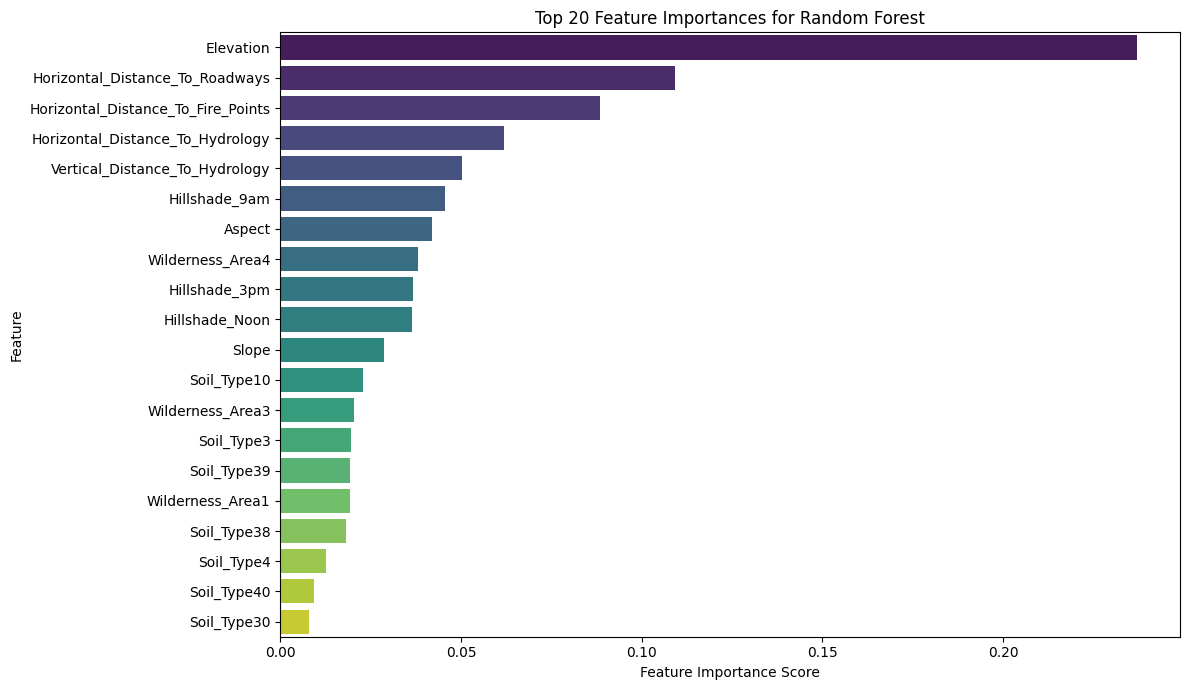

In [ ]:
# Visualize RF Model Performance
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest", display_class_labels)
plot_feature_importance(rf_model, X.columns, "Random Forest")

In [ ]:
# XGBoost requires class labels to be 0 to num_class-1, which we already did.
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)),
                          n_estimators=100, learning_rate=0.1, random_state=42,
                          use_label_encoder=False, eval_metric='mlogloss',
                          tree_method='hist', # Use 'hist' for faster training on large datasets
                          n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=display_class_labels))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:09:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Performance:
Accuracy: 0.8126
Classification Report:
              precision    recall  f1-score   support

      Type 1       0.81      0.78      0.80     42368
      Type 2       0.81      0.86      0.84     56661
      Type 3       0.79      0.86      0.82      7151
      Type 4       0.83      0.83      0.83       549
      Type 5       0.88      0.31      0.46      1899
      Type 6       0.74      0.49      0.59      3473
      Type 7       0.90      0.80      0.85      4102

    accuracy                           0.81    116203
   macro avg       0.82      0.71      0.74    116203
weighted avg       0.81      0.81      0.81    116203



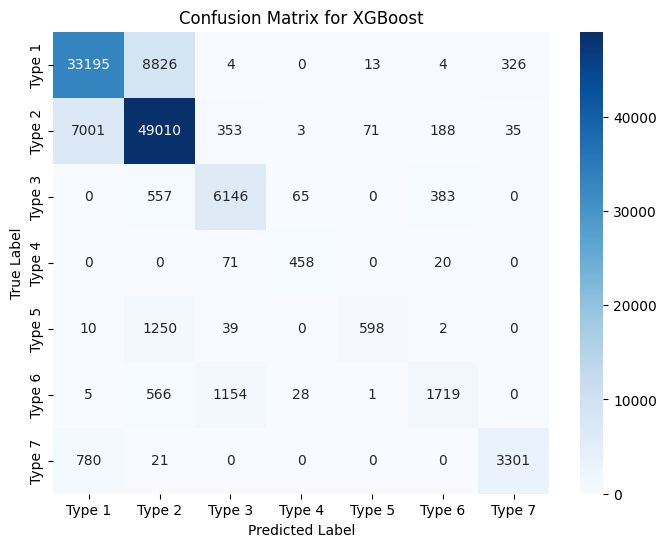

/tmp/ipython-input-2767526744.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[top_indices], y=[feature_names[i] for i in top_indices], palette='viridis')


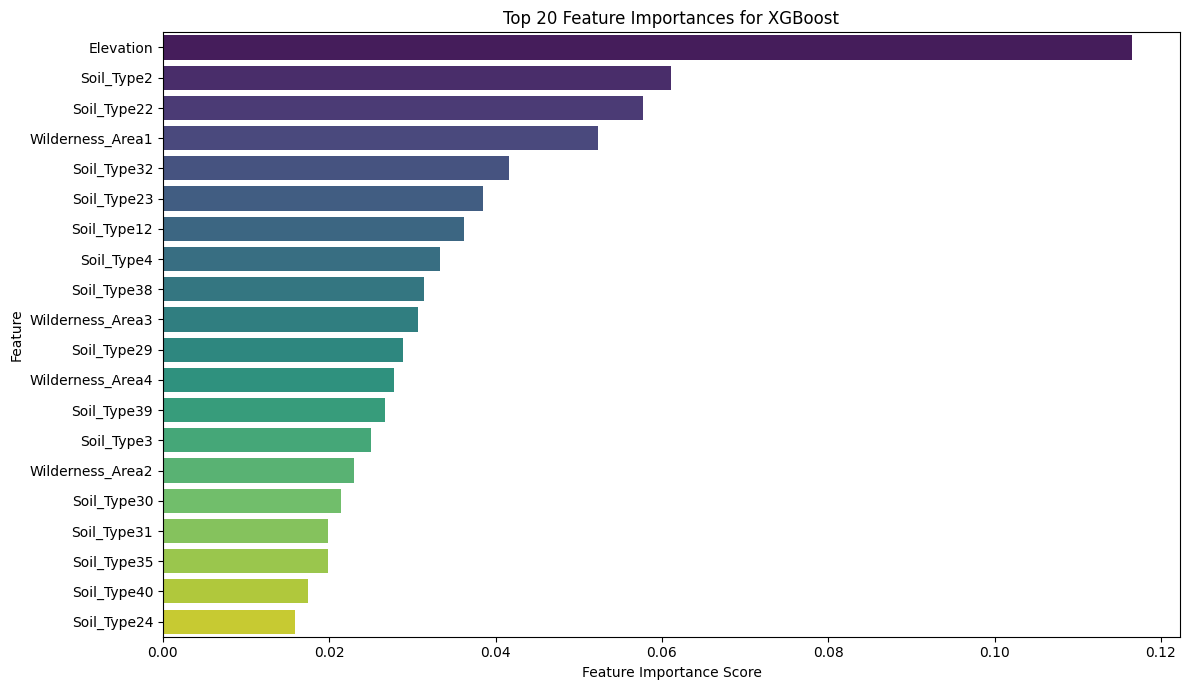

In [ ]:
# Visualize XGB Model Performance
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost", display_class_labels)
plot_feature_importance(xgb_model, X.columns, "XGBoost")

# Hyperparameter Tuned Models

In [ ]:
# Train RF Model
rf_model_tuned = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced')
rf_model_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

print("\nRandom Forest (Tuned) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned, target_names=display_class_labels))


Random Forest Performance:
Accuracy: 0.9550
Classification Report:
              precision    recall  f1-score   support

      Type 1       0.97      0.94      0.95     42368
      Type 2       0.95      0.97      0.96     56661
      Type 3       0.94      0.96      0.95      7151
      Type 4       0.91      0.85      0.88       549
      Type 5       0.95      0.79      0.86      1899
      Type 6       0.94      0.89      0.91      3473
      Type 7       0.97      0.95      0.96      4102

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



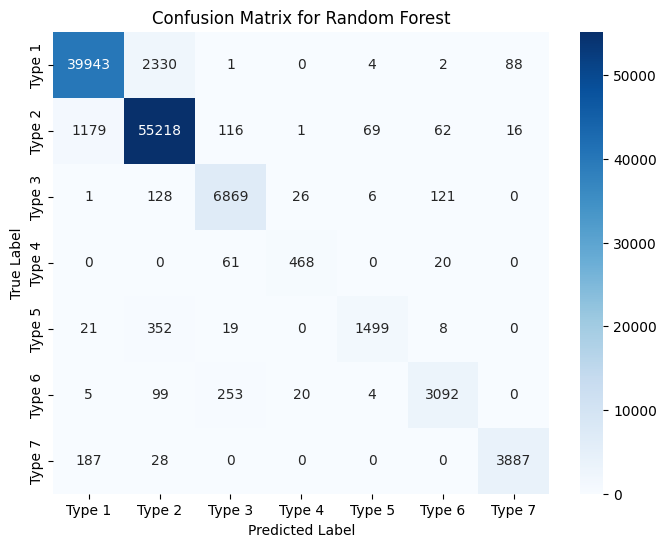

/tmp/ipython-input-2767526744.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[top_indices], y=[feature_names[i] for i in top_indices], palette='viridis')


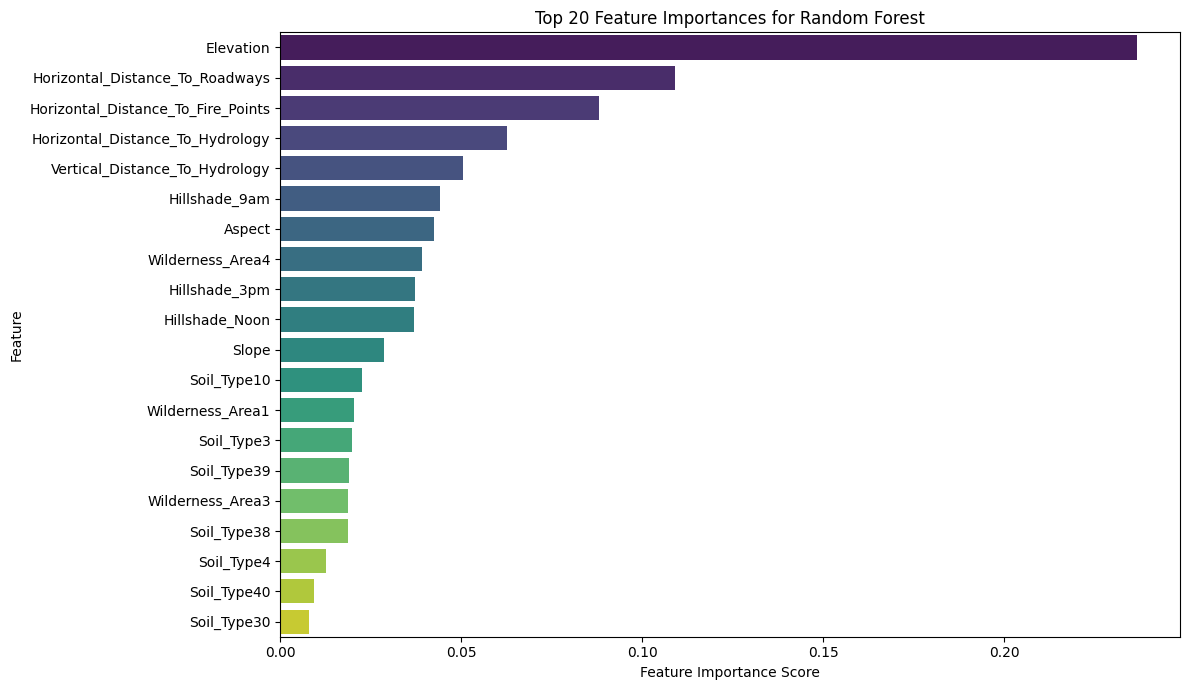

In [ ]:
# Visualize RF Model Performance
plot_confusion_matrix(y_test, y_pred_rf_tuned, "Random Forest", display_class_labels)
plot_feature_importance(rf_model_tuned, X.columns, "Random Forest")

In [ ]:
# XGBoost requires class labels to be 0 to num_class-1, which we already did.
xgb_model_tuned = XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)),
                          n_estimators=200, learning_rate=0.2, random_state=42,
                          use_label_encoder=False, eval_metric='mlogloss',
                          tree_method='hist', # Use 'hist' for faster training on large datasets
                          n_jobs=-1)
xgb_model_tuned.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_model_tuned.predict(X_test)

print("\nXGBoost (Tuned) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_tuned):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_tuned, target_names=display_class_labels))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:16:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost (Tuned) Performance:
Accuracy: 0.8832
Classification Report:
              precision    recall  f1-score   support

      Type 1       0.88      0.85      0.86     42368
      Type 2       0.88      0.91      0.89     56661
      Type 3       0.91      0.93      0.92      7151
      Type 4       0.89      0.87      0.88       549
      Type 5       0.89      0.66      0.76      1899
      Type 6       0.87      0.85      0.86      3473
      Type 7       0.95      0.93      0.94      4102

    accuracy                           0.88    116203
   macro avg       0.90      0.86      0.87    116203
weighted avg       0.88      0.88      0.88    116203



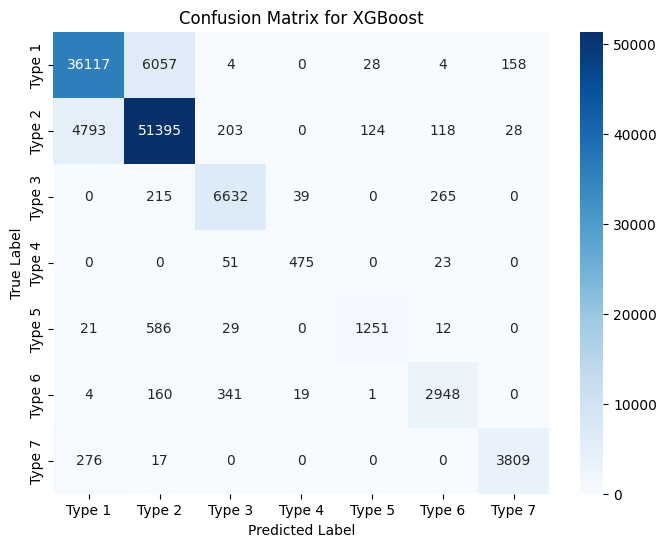

/tmp/ipython-input-2767526744.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[top_indices], y=[feature_names[i] for i in top_indices], palette='viridis')


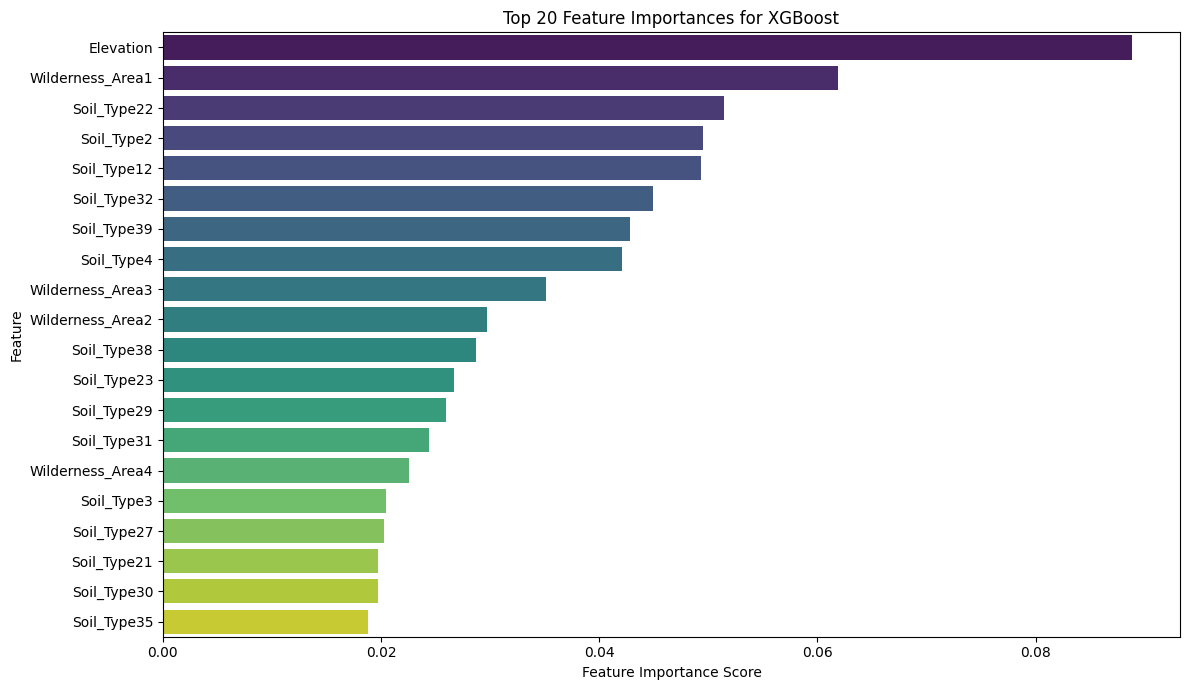

In [ ]:
# Visualize XGB Model Performance
plot_confusion_matrix(y_test, y_pred_xgb_tuned, "XGBoost", display_class_labels)
plot_feature_importance(xgb_model_tuned, X.columns, "XGBoost")

# Models Comparison


=== Comparison Table (Sorted by F1-score) ===
                Model  Accuracy  Precision (macro)  Recall (macro)  F1-score (macro)
Random Forest (Tuned)  0.955018           0.945726        0.908224          0.925649
        Random Forest  0.954795           0.945537        0.906165          0.924375
      XGBoost (Tuned)  0.883170           0.897131        0.855475          0.873677
              XGBoost  0.812604           0.822962        0.708108          0.742408


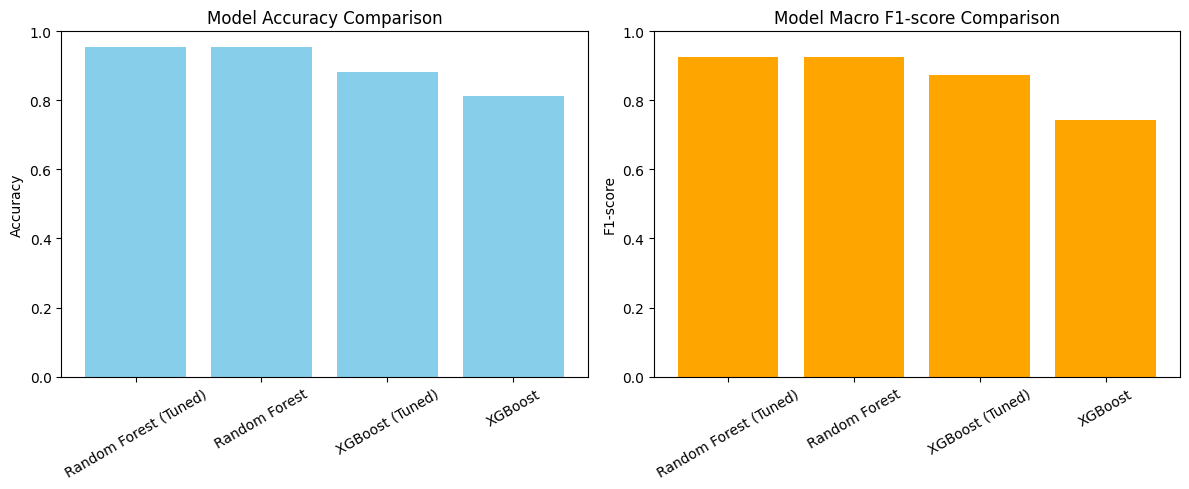

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Store model results for comparison
model_results = {
    "Random Forest": {
        "model": rf_model,
        "y_pred": y_pred_rf
    },
    "XGBoost": {
        "model": xgb_model,
        "y_pred": y_pred_xgb
    },
    "Random Forest (Tuned)": {
        "model": rf_model_tuned,
        "y_pred": y_pred_rf_tuned
    },
    "XGBoost (Tuned)": {
        "model": xgb_model_tuned,
        "y_pred": xgb_model_tuned.predict(X_test)  # Fixed bug
    }
}

# Evaluate all models without confusion matrix or feature importance
comparison_metrics = []

for name, info in model_results.items():
    y_pred = info["y_pred"]

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    comparison_metrics.append({
        "Model": name,
        "Accuracy": acc,
        "Precision (macro)": precision,
        "Recall (macro)": recall,
        "F1-score (macro)": f1
    })

# Convert to DataFrame for better display
df_compare = pd.DataFrame(comparison_metrics).sort_values(by="F1-score (macro)", ascending=False)
print("\n=== Comparison Table (Sorted by F1-score) ===")
print(df_compare.to_string(index=False))

# Plot Accuracy and F1-score
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy bar chart
axs[0].bar(df_compare["Model"], df_compare["Accuracy"], color='skyblue')
axs[0].set_title("Model Accuracy Comparison")
axs[0].set_ylabel("Accuracy")
axs[0].set_ylim(0, 1)
axs[0].tick_params(axis='x', rotation=30)

# F1-score bar chart
axs[1].bar(df_compare["Model"], df_compare["F1-score (macro)"], color='orange')
axs[1].set_title("Model Macro F1-score Comparison")
axs[1].set_ylabel("F1-score")
axs[1].set_ylim(0, 1)
axs[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()